In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline

# Read and Analyse Data

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print("The shape of the data is:",df.shape)

The shape of the data is: (25, 2)


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

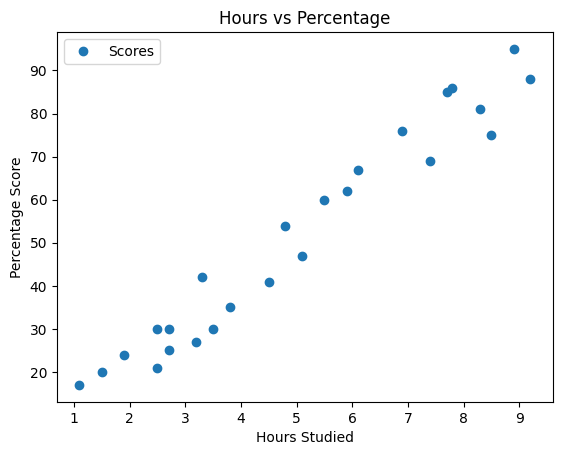

In [5]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the Data

In [6]:
x = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores']).reshape(-1,1)

# Splitting Data into Train and Test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Training

In [8]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

# Plotting the Line of Regression

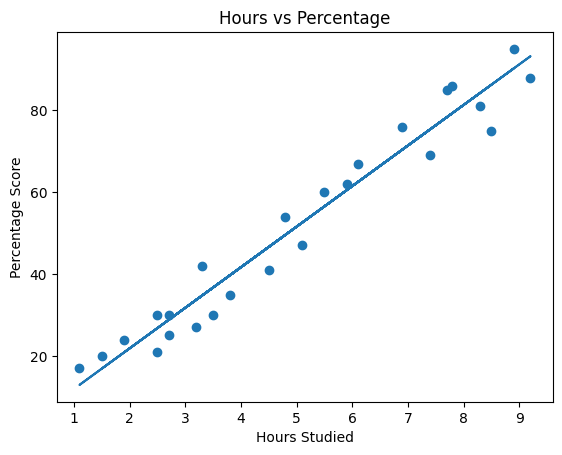

In [9]:
regressor_line = regr.coef_*x+regr.intercept_
plt.scatter(x, y)
plt.plot(x, regressor_line)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# Making Predictions

In [10]:
y_pred  = regr.predict(x_test)

# Training and Testing Scores

In [11]:
print("The training score is:",regr.score(x_train,y_train))
print("The testing score is:",regr.score(x_test,y_test))

The training score is: 0.9515510725211552
The testing score is: 0.9454906892105354


# Comparing Actual Vs Predicted Results

In [12]:
df_compare = pd.DataFrame({'Actual': np.array(y_test).reshape(1,-1)[0], 'Predicted': np.array(y_pred).reshape(1,-1)[0]})  
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


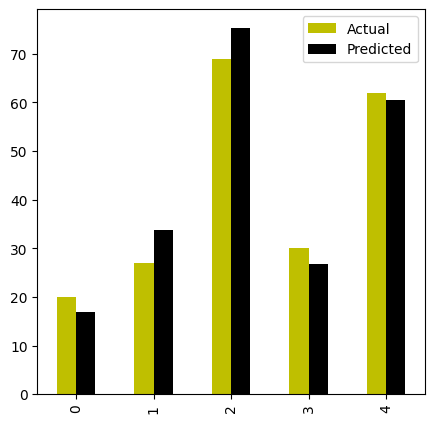

In [13]:
my_colors = list(islice(cycle(['y', 'k']), None, len(df_compare)))
df_compare.plot(kind='bar',figsize=(5,5),color=my_colors)
plt.show()

# Testing with Own Data

In [14]:
hours = 9.25
own_pred = regr.predict(np.array(hours).reshape(-1,1))
print("No of Hours =",hours)
print("Predicted Score =",own_pred[0][0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluation

In [15]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
